In [1]:
!pip install selenium

In [2]:
!pip install selenium_stealth

In [3]:
pip install webdriver-manager

Note: you may need to restart the kernel to use updated packages.


In [4]:
import time
from tqdm import tqdm
import os
import sys

# Удобноее импортирование модулей из scripts
wd = os.getcwd()
wd = wd[:-wd[::-1].find("\\")]
wd_data = "data\\"
sys.path.append(wd + 'scripts')
from Paeser import yand

In [3]:
#Сбор данных

In [5]:
from selenium import webdriver
from selenium_stealth import stealth
from selenium.webdriver.chrome.service import Service
from webdriver_manager.chrome import ChromeDriverManager

In [6]:
def create_web_driver_stealth() -> webdriver.Chrome:
    options = webdriver.ChromeOptions()
    options.add_argument("start-maximized") 
    #options.add_argument("--headless=new")
    options.add_argument("--disable-gpu")
    options.add_argument("--window-size=1920,1080")
    options.add_argument("--enable-javascript")
    options.add_argument("--lang=en-US")
    options.add_argument("--disable-blink-features=AutomationControlled")
    options.add_argument("user-agent=Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36")
    
    options.add_experimental_option("excludeSwitches", ["enable-automation"])
    options.add_experimental_option('useAutomationExtension', False)
    
    s = Service(ChromeDriverManager().install())
    stealth_driver = webdriver.Chrome(service=s, options=options)
    
    with open('navigator_config.json', 'r') as file:
        nav_data = json.load(file)
        del nav_data['plugins']
        del nav_data['mimeTypes']
    
    def get_com(i):
        return """Object.defineProperty(navigator, '%s', {get: () => "%s"});
        """ % (i[0], i[1])
    
    js_script = ''.join([get_com(i) for i in nav_data.items()])
    

    # Подмена navigator properties
    stealth_driver.execute_cdp_cmd("Page.addScriptToEvaluateOnNewDocument", {
    "source": """
    Object.defineProperty(navigator, 'webdriver', {get: () => false});
    Object.defineProperty(navigator, 'plugins', {get: () => [1, 2, 3]});
    Object.defineProperty(navigator, 'languages', {get: () => ['ru-RU', 'ru']});
    """
    })

    stealth_driver.execute_script(js_script)
    
    
    return stealth_driver

In [7]:
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.action_chains import ActionChains
import pandas as pd
import matplotlib.pyplot as plt

In [14]:
url = "https://market.yandex.ru"
list_request = ["Ноутбук", "Нетбук", "Игровой ноутбук", "laptop"]

df = pd.DataFrame({'title': [], 'about': [], 'price': [],'rating': [],'reviews':[],'market': [],'link': [],'req': []})

start_time = time.perf_counter()  # про time.perf_counter https://superfastpython.com/time-time-vs-time-perf_counter/
driver = create_web_driver_stealth()

driver.get(url)
time.sleep(5)
actions = ActionChains(driver)
actions.move_by_offset(10, 10).click().perform()

print(url)
for req in tqdm(list_request):
    if url == "https://market.yandex.ru":
        df = yand(req, driver, df)
    
duration = time.perf_counter() - start_time
    
print(f"Downloaded site in {duration} seconds")

https://market.yandex.ru


100%|████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:41<00:00, 10.30s/it]

Downloaded site in 53.2510884000003 seconds


In [ ]:
# Сохраним данные

In [15]:
df.to_csv(wd + wd_data +'dataset_parsing_laptops_on_yand_market.csv')

In [16]:
#Загрузка данных

In [17]:
df = pd.read_csv(wd + wd_data +'dataset_parsing_laptops_on_yand_market.csv').drop("Unnamed: 0", axis = 1)

In [18]:
# Посмотрим датасет
df

,title,about,price,rating,reviews,market,link,req
0,Ноутбук WatchMe с процессором Intel Celeron и ...,{},23364.0,4.4,432.0,yand,https://market.yandex.ru/product--noutbuk-watc...,Ноутбук
1,Ноутбук HUAWEI MateBook D16 Intel core i5-1245...,{},47182.0,4.8,298.0,yand,https://market.yandex.ru/product--noutbuk-huaw...,Ноутбук
2,Ноутбук Acer Extensa 15 EX215-23 Ryzen 5 7520U...,{},34004.0,4.8,58.0,yand,https://market.yandex.ru/product--noutbuk-acer...,Ноутбук
3,Ноутбук для работы и учебы Echips Argentum 15....,{},24250.0,4.7,100.0,yand,https://market.yandex.ru/product--noutbuk-dlia...,Ноутбук
4,Игровой ноутбук Asus TUF Gaming FA507NVR-LP040...,{},85766.0,5.0,12.0,yand,https://market.yandex.ru/product--igrovoi-nout...,Ноутбук
...,...,...,...,...,...,...,...,...
294,"Ноутбук ASUS X1704ZA-AU394 17.3"" (90NB10F1-M00...","{'Экран:': '17.3"" (1920x1080) WVA, 60 Гц', 'Пр...",44999.0,3.7,3.0,yand,https://market.yandex.ru/product--noutbuk-asus...,laptop
295,"Ноутбук для работы и учебы 16"" Intel N95 (до 3...","{'Экран:': '16"" (1920x1080) IPS, 60 Гц', 'Проц...",36456.0,4.9,27.0,yand,https://market.yandex.ru/product--noutbuk-dlia...,laptop
296,"Ноутбук 16"", Intel N95, RAM 16 ГБ, SSD 1024 ГБ...","{'Экран:': '16"" (1920x1080) IPS, 60 Гц', 'Проц...",31262.0,4.7,140.0,yand,https://market.yandex.ru/product--noutbuk-16-i...,laptop
297,Ноутбук HONOR MagicBook X14 2025 i5-12450H 16/...,"{'Экран:': '14"" (1920x1200) IPS, 60 Гц', 'Проц...",49499.0,4.8,5.0,yand,https://market.yandex.ru/product--noutbuk-hono...,laptop


In [19]:
# Достанем ссылку и проверим соответствие данных товара
print(df.loc[53])
df.loc[53]["link"]

title      Ноутбук OSiO FocusLine F150a-004/15.6"/AMD Ryz...
about      {'Экран:': '15.6" (1920x1080) IPS, 60 Гц', 'Пр...
price                                                38609.0
rating                                                   4.8
reviews                                                 64.0
market                                                  yand
link       https://market.yandex.ru/product--noutbuk-osio...
req                                                  Ноутбук
Name: 53, dtype: object


'https://market.yandex.ru/product--noutbuk-osio-focusline-f150a-004-15-6-amd-ryzen-5-5560u-16-512-win-grey/55455922?hid=90401&sku=102707412678&show-uid=17473026156849018679206023&from=search&cpa=1&do-waremd5=Kj3Kk9X-3RVHKl_-IiuKhw&sponsored=1&cpc=o-Z4bbV6p8ufvJ9xv-CAKDe-5WWU7if-i8aAQT-jvlOMivu10BGd4v9NW6h8frQNaBFH3oiAujHIZo8_2qB_UDnsERH-Hu4XEXay7coX3JaE5HYicBiNFYS-PPL29-4N2tmriYUfZwdcQMhNzNvsCvbCjkT6LQEpzv2GX8zVqvj6dtm4A8qpZhn20N0qlEh3LN-q_xyisj41CxTrt-aEunw6QFyi6JOzZutwAXVKIe9vzrcN4DSxmeHebDZ1Cvt5SWNXdqMYwBE-nB4ceRJNlOpkivMu1A1eFXLly5MJQ6R-CO_kXqOH9QjjieESMxky5NveHPETL01MZ-gn_jxqOHFDQGFCvGe2enTlH2dHl62z04oJF8w2tTo5bboFQOwkJuriPQZhgvVw4XRHPPHvpH0ZqzN3Q9G6hSSI942O_Ltox_NTk_8B2OUgop-jiWLfNXxok-16L2UkV9D7aUIXanGbez1JhLxWo_mkz0ZdQ21HwvIsxb0dm7SNP3kEBZcWka-iCFPXKx6BV4InE6Vfgni2-sxLAtvE-lEyZy4uMD_8OHouxldp_Q%2C%2C&cc=CiBmMjdjMDRmMWE2YzQ4MmM4ZjI4OWI4ZTUxMzg2ZTE4YhCIAoB95u0G&uniqueId=119485579&cpm-adv=1'

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   title    299 non-null    object 
 1   about    299 non-null    object 
 2   price    299 non-null    float64
 3   rating   299 non-null    float64
 4   reviews  299 non-null    float64
 5   market   299 non-null    object 
 6   link     299 non-null    object 
 7   req      299 non-null    object 
dtypes: float64(3), object(5)
memory usage: 18.8+ KB


In [21]:
# Поменяем тип данных на корректныe
df.price = df.price.astype(int)
df.reviews = df.reviews.astype(int)

In [22]:
print("\nПропуски в данных:")
print(df.isnull().sum())


Пропуски в данных:
title      0
about      0
price      0
rating     0
reviews    0
market     0
link       0
req        0
dtype: int64


In [23]:
#пропусков нет из-за того что при пропусках в парсинге вызывалось исключение и такие данные не шли в датасет

In [24]:
print("\nОписательные статистики:")
print(df.describe(include='all'))


Описательные статистики:
                                                    title about  \
count                                                 299   299   
unique                                                166   111   
top     Ноутбук игровой Machenike S15 Quazar 15.6", In...    {}   
freq                                                   13   159   
mean                                                  NaN   NaN   
std                                                   NaN   NaN   
min                                                   NaN   NaN   
25%                                                   NaN   NaN   
50%                                                   NaN   NaN   
75%                                                   NaN   NaN   
max                                                   NaN   NaN   

                price      rating      reviews market  \
count      299.000000  299.000000   299.000000    299   
unique            NaN         NaN          NaN      1  

In [25]:
#рейтинг в пятибальной шкале, максимум - 5.0, а минимум у нас 3.0 значит всё верно
#Количесиво отзывов нормальное, минимум 1, так как товары без отзывов не добавлялись в датафрейм при парсинге
#Цена в 6 тысяч настораживает, но имеет место быть

In [26]:
#Посмотрим самый дешёвый и дорогой ноутбуки

In [27]:
df[df.price== 6434]["link"].values

array(['https://market.yandex.ru/product--10-1-netbuk-samsung-n102sp-1024x600-intel-atom-n2100-1x1-6ggts-ram-2-gb-hdd-320-gb-chernyi-windows-7/844800881?hid=90401&sku=103621661766&show-uid=17473026279637851146306026&from=search&cpa=1&do-waremd5=oLdUv6H1sWV4jNXiooo9qg&cpc=nqGmsujVVPesgQiwOop8cK_kk_4RRBhUTAiAMAu7xxjna-yuZVE039dSnRrFveSWNbREdUdeargtdhTszhAB5Eszu9OR3UuyBSj7UKaW5fsgJREvIN7Et2I5o9R7oOPC06eOhOJSwhd6R9tQr0dZF5gLGuptPazYZhKOHRGnTE9WGkd3q6gmsdy5B1q1ExSiEoZcrO1Az90mkYSp1slAStpcijOgcDtvhdcCsZtM1z2SnLrjiUuML-jtqD-pRyRglmfrNIuchHk1COSVu2PssU3pPL-Llp1p_QdC1ZzT2kJqzyaoiPKuW064HzGJRlD8KNMjvt9GU74qfMvh5jKj-nxstZZL0FSxhlhVPJVtHI5zMG1VGnO6TwiDhOdDbX-ZkijdIb3eOu8cs3JBlt8Il7WT52hF6egzVEraeIk9Kdf9mJlf_G5c-kl6zxeUu2peu0chaIkofKUcacsuoSaEFf-KS89UHb6CuO4XkbWk492xJg7bl65C_pOLVQduSN0tm8mN56tXja0bCfH42Ra1_6o4VzEYrHHr&cc=CiAzZmM2ZTlkMjkwNDk4MGI1YTAzM2UxZTZhMDI2ZWFkORAHgH3m7QY%2C&uniqueId=82452083&resale_goods=resale_resale&resale_goods_condition=resale_well'],
      dtype=object)

In [28]:
df[df.price== 322245]["link"].values

array([], dtype=object)

In [29]:
# Удалим данные с пропусками(на всякий случай) и дубликаты
df = df.dropna()
df = df.drop_duplicates()

def Is_there_any_truth(lst):
    for i in lst:
        if i == True:
            return True
    return False


#Очистим от товаров не содержащих интересующее нас слова
list_request = ['Ноутбук', 'Нетбук', 'laptop']
df = df[df.apply(lambda x: Is_there_any_truth([i.lower() in x['title'].lower() for i in list_request]), axis=1)]

#Очистим данные от выбросов

def clearing(df, reqvest = None, col_name = "price"):
    if reqvest != None:
        filtred_df = df[df.req == reqvest]
    else:
        filtred_df = df
    
    q1 = filtred_df[col_name].quantile(0.25)
    q3 = filtred_df[col_name].quantile(0.75)
    iqr = q3 - q1
    df = df[((df[col_name] < q3 + 1.5 * iqr) & (df[col_name] > q1 - 1.5 * iqr)) | (df.req != reqvest)]
    return df

df = clearing(df)
df

,title,about,price,rating,reviews,market,link,req
0,Ноутбук WatchMe с процессором Intel Celeron и ...,{},23364,4.4,432,yand,https://market.yandex.ru/product--noutbuk-watc...,Ноутбук
1,Ноутбук HUAWEI MateBook D16 Intel core i5-1245...,{},47182,4.8,298,yand,https://market.yandex.ru/product--noutbuk-huaw...,Ноутбук
2,Ноутбук Acer Extensa 15 EX215-23 Ryzen 5 7520U...,{},34004,4.8,58,yand,https://market.yandex.ru/product--noutbuk-acer...,Ноутбук
3,Ноутбук для работы и учебы Echips Argentum 15....,{},24250,4.7,100,yand,https://market.yandex.ru/product--noutbuk-dlia...,Ноутбук
4,Игровой ноутбук Asus TUF Gaming FA507NVR-LP040...,{},85766,5.0,12,yand,https://market.yandex.ru/product--igrovoi-nout...,Ноутбук
...,...,...,...,...,...,...,...,...
294,"Ноутбук ASUS X1704ZA-AU394 17.3"" (90NB10F1-M00...","{'Экран:': '17.3"" (1920x1080) WVA, 60 Гц', 'Пр...",44999,3.7,3,yand,https://market.yandex.ru/product--noutbuk-asus...,laptop
295,"Ноутбук для работы и учебы 16"" Intel N95 (до 3...","{'Экран:': '16"" (1920x1080) IPS, 60 Гц', 'Проц...",36456,4.9,27,yand,https://market.yandex.ru/product--noutbuk-dlia...,laptop
296,"Ноутбук 16"", Intel N95, RAM 16 ГБ, SSD 1024 ГБ...","{'Экран:': '16"" (1920x1080) IPS, 60 Гц', 'Проц...",31262,4.7,140,yand,https://market.yandex.ru/product--noutbuk-16-i...,laptop
297,Ноутбук HONOR MagicBook X14 2025 i5-12450H 16/...,"{'Экран:': '14"" (1920x1200) IPS, 60 Гц', 'Проц...",49499,4.8,5,yand,https://market.yandex.ru/product--noutbuk-hono...,laptop


In [30]:
# Анализ числовых переменных у очищенных данных
numeric_cols = ['price', 'rating', 'reviews']
for col in numeric_cols:
    print(f"\nАнализ столбца {col}:")
    print(f"Медиана: {df[col].median()}")
    print(f"Среднее: {df[col].mean()}")
    print(f"Стандартное отклонение: {df[col].std()}")
    print(f"Минимум: {df[col].min()}")
    print(f"Максимум: {df[col].max()}")
    print(f"Количество нулевых значений: {(df[col] == 0).sum()}")


Анализ столбца price:
Медиана: 47519.0
Среднее: 59602.952861952865
Стандартное отклонение: 37825.22584887023
Минимум: 6434
Максимум: 192802
Количество нулевых значений: 0

Анализ столбца rating:
Медиана: 4.8
Среднее: 4.738720538720538
Стандартное отклонение: 0.26165219464371203
Минимум: 2.5
Максимум: 5.0
Количество нулевых значений: 0

Анализ столбца reviews:
Медиана: 59.0
Среднее: 240.7104377104377
Стандартное отклонение: 364.86433566187804
Минимум: 1
Максимум: 1531
Количество нулевых значений: 0


In [31]:
# Значения не вызывают подозрений - всё в пределах нормы

In [32]:
df

,title,about,price,rating,reviews,market,link,req
0,Ноутбук WatchMe с процессором Intel Celeron и ...,{},23364,4.4,432,yand,https://market.yandex.ru/product--noutbuk-watc...,Ноутбук
1,Ноутбук HUAWEI MateBook D16 Intel core i5-1245...,{},47182,4.8,298,yand,https://market.yandex.ru/product--noutbuk-huaw...,Ноутбук
2,Ноутбук Acer Extensa 15 EX215-23 Ryzen 5 7520U...,{},34004,4.8,58,yand,https://market.yandex.ru/product--noutbuk-acer...,Ноутбук
3,Ноутбук для работы и учебы Echips Argentum 15....,{},24250,4.7,100,yand,https://market.yandex.ru/product--noutbuk-dlia...,Ноутбук
4,Игровой ноутбук Asus TUF Gaming FA507NVR-LP040...,{},85766,5.0,12,yand,https://market.yandex.ru/product--igrovoi-nout...,Ноутбук
...,...,...,...,...,...,...,...,...
294,"Ноутбук ASUS X1704ZA-AU394 17.3"" (90NB10F1-M00...","{'Экран:': '17.3"" (1920x1080) WVA, 60 Гц', 'Пр...",44999,3.7,3,yand,https://market.yandex.ru/product--noutbuk-asus...,laptop
295,"Ноутбук для работы и учебы 16"" Intel N95 (до 3...","{'Экран:': '16"" (1920x1080) IPS, 60 Гц', 'Проц...",36456,4.9,27,yand,https://market.yandex.ru/product--noutbuk-dlia...,laptop
296,"Ноутбук 16"", Intel N95, RAM 16 ГБ, SSD 1024 ГБ...","{'Экран:': '16"" (1920x1080) IPS, 60 Гц', 'Проц...",31262,4.7,140,yand,https://market.yandex.ru/product--noutbuk-16-i...,laptop
297,Ноутбук HONOR MagicBook X14 2025 i5-12450H 16/...,"{'Экран:': '14"" (1920x1200) IPS, 60 Гц', 'Проц...",49499,4.8,5,yand,https://market.yandex.ru/product--noutbuk-hono...,laptop


In [33]:
#сохраним очищенные данные
df.to_csv(wd + wd_data +'clean_dataset_parsing_laptops_on_yand_market.csv')

In [34]:
# Загрузим очищенные данные
df = pd.read_csv(wd + wd_data +'clean_dataset_parsing_laptops_on_yand_market.csv').drop("Unnamed: 0", axis = 1)

DeltaGenerator()

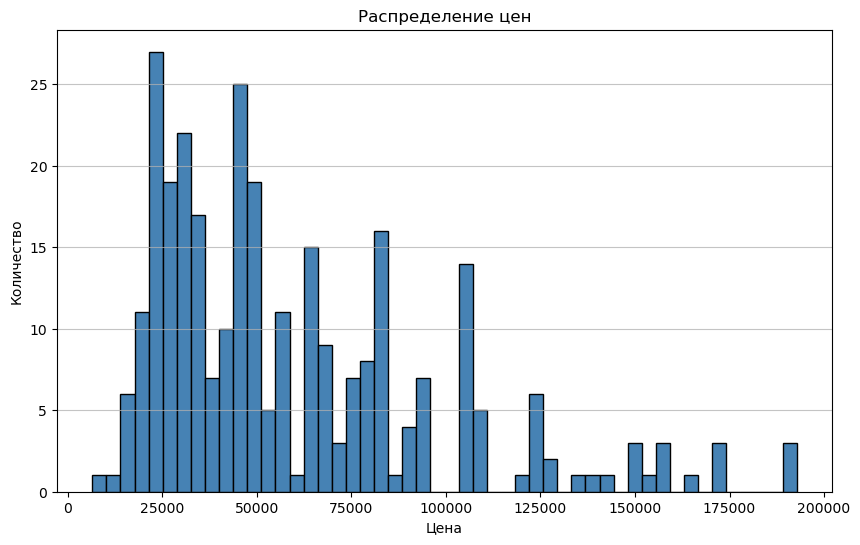

In [45]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.hist(df['price'].dropna(), bins=50, color='steelblue', edgecolor='black')
ax.set_title('Распределение цен')
ax.set_xlabel('Цена')
ax.set_ylabel('Количество')
ax.grid(axis='y', alpha=0.75)
st.pyplot(fig)

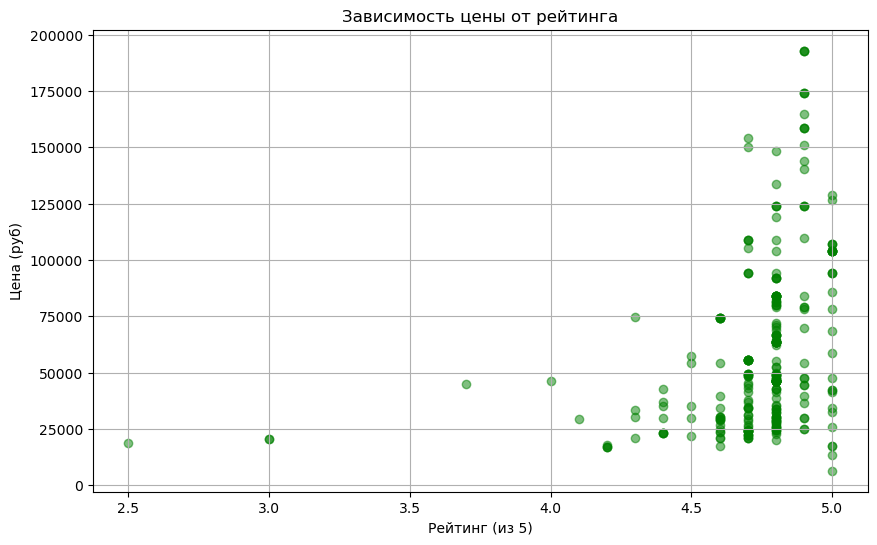

In [36]:
plt.figure(figsize=(10, 6))
plt.scatter(df['rating'], df['price'], alpha=0.5, color='green')
plt.title('Зависимость цены от рейтинга')
plt.xlabel('Рейтинг (из 5)')
plt.ylabel('Цена (руб)')
plt.grid(True)
plt.show()

In [47]:
correlation = df[['price', 'rating']].corr().iloc[0,1]
print(f"Коэффициент корреляции: {correlation:.2f}")

Коэффициент корреляции: 0.32


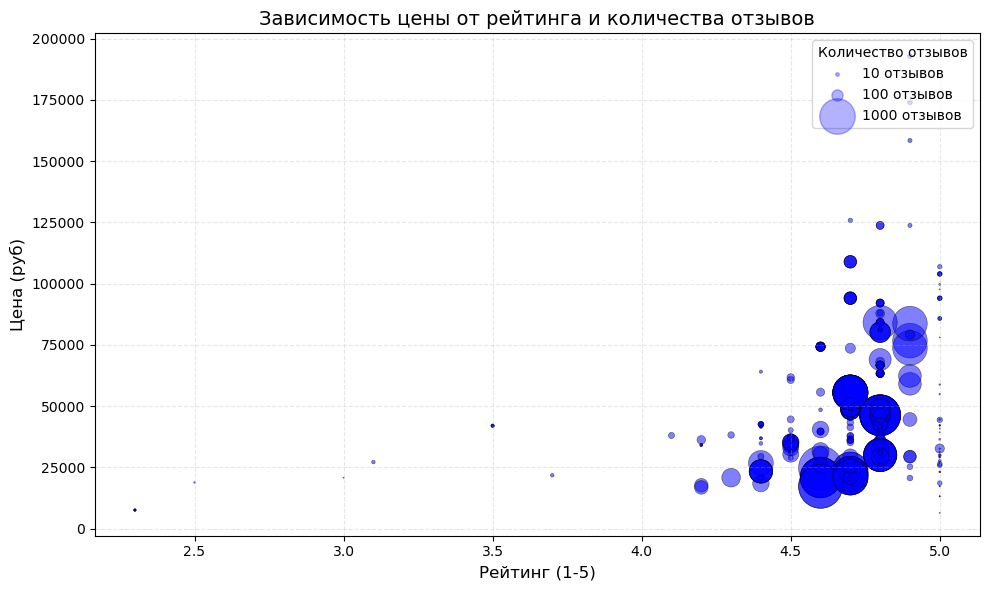

In [51]:
# Нормализация размера пузырей (чтобы не были слишком большими)
max_reviews = df['reviews'].max()
min_reviews = df['reviews'].min()
size_scale = 1000  # Масштабирующий коэффициент

plt.figure(figsize=(10, 6))

# Пузырьковая диаграмма (все точки одного цвета)
scatter = plt.scatter(
    x=df['rating'],
    y=df['price'],
    s=df['reviews'] / max_reviews * size_scale,
    c='blue',          # Один цвет для всех точек
    alpha=0.5,         # Прозрачность
    edgecolors='black', # Граница пузырей
    linewidth=0.5
)

plt.title('Зависимость цены от рейтинга и количества отзывов', fontsize=14)
plt.xlabel('Рейтинг (1-5)', fontsize=12)
plt.ylabel('Цена (руб)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.3)

# Добавляем легенду для размера пузырей
for reviews in [10, 100, 1000]:
    plt.scatter([], [], c='blue', alpha=0.3, s=reviews / max_reviews * size_scale,
                label=f'{reviews} отзывов')
plt.legend(title='Количество отзывов', loc='upper right')

plt.tight_layout()
plt.show()